In [1]:
import cv2 as cv
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets


In [68]:
Video_1 = cv.VideoCapture("../Vídeos/video-1.mp4")
frames_V1 = [cv.cvtColor(Video_1.read()[1], cv.COLOR_BGR2RGB) 
             for _ in range(2,int(Video_1.get(cv.CAP_PROP_FRAME_COUNT)))]

Video_2 = cv.VideoCapture("../Vídeos/video-2.mp4")
frames_V2 = [cv.cvtColor(Video_2.read()[1], cv.COLOR_BGR2RGB) for _ in range(2,int(Video_2.get(cv.CAP_PROP_FRAME_COUNT)))]


In [5]:
interact(lambda index:plt.imshow(frames_V1[index]), 
         index = widgets.IntSlider(min=0,max=(len(frames_V1)-1),
                                   step=1,value=0));

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEludFNsaWRlcih2YWx1ZT0wLCBkZXNjcmlwdGlvbj11J2luZGV4JywgbWF4PTcyKSwgT3V0cHV0KCkpLCBfZG9tX2NsYXNzZXM9KHUnd2lkZ2V0LWludGXigKY=


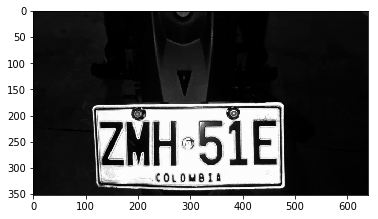

In [37]:
img=frames_V1[1]
imgray=cv.cvtColor(img,cv.COLOR_RGB2GRAY)
plt.imshow(imgray,cmap='gray')

In [38]:
#Definición de combinación RGB para trabajar
#I=cv.absdiff(rGb,rgB);
#s=np.absolute(rGb-Rgb)
s=cv.cvtColor(img,cv.COLOR_BGR2GRAY)
I=s;
II=I;
#cv.imshow('',II)
#cv.waitKey(0);

#Binarización inicial de la imagen
[fil,col]=I.shape
for i in range(0,fil):
    for j in range(0,col):
        if I[i,j]<150:
            I[i,j]=0;
            
for i in range(0,fil):
    for j in range(0,col):
        if I[i,j]>0:
            I[i,j]=1;

(352, 640)


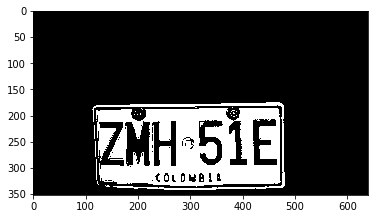

In [39]:
print I.shape
plt.imshow(I,cmap='gray')

In [40]:
#Transformaciones morfologicas
se=np.ones((50,50),np.uint8);
se2=np.ones((10,10),np.uint8);
closing=cv.morphologyEx(I,cv.MORPH_CLOSE,se)
dilataion=cv.dilate(closing,se2,1)

#Encontrar contornos 
S,contours,hierarchy=cv.findContours(dilataion,cv.RETR_TREE,cv.CHAIN_APPROX_SIMPLE);
cnt=contours[:];
num=len(cnt);
box=np.zeros((num,4));

for j in range(num):
    box[j,:]=cv.boundingRect(cnt[j]);

L=np.zeros((num,4));
Max=[0,0];

for j in range(0,num):
    L[j,:]=box[j];
    if L[j,2]>Max[0]:
        Max=[j,L[j,2]];

BOX=box[Max[0],:];
#Mascara
b=img[int(BOX[1]):int(BOX[1]+BOX[2]),int(BOX[0]):int(BOX[0]+BOX[2]),:];
directorio2="../blanks/blank (%d).jpg" %(1);
cv.imwrite(directorio2,b);

In [41]:
#Segmentación
directorio3="../blanks/blank (%d).jpg" %(1);
A=cv.imread(directorio3);
[fil,col,cap]=A.shape
rgB=A[:,:,0];
rGb=A[:,:,1];
Rgb=A[:,:,2];
#Nomrmalización
R=Rgb/255.0;
G=rGb/255.0;
B=rgB/255.0;
#construcción de espacio k de color
K=np.zeros((fil,col));
for i in range(0,fil):
    for j in range(0,col):        
        MAX=max(R[i,j],G[i,j],B[i,j]);
        K[i,j]=1-MAX;

cv.imwrite("./prueba.bmp",K);
k=cv.imread("./prueba.bmp");
BW1=cv.Laplacian(k,cv.CV_8UC1);
Image=BW1[:,:,0]+BW1[:,:,1]+BW1[:,:,2]

In [42]:
#Se calcula boundingRect para encontrar los caracteres de interes
ret,thresh=cv.threshold(Image,0,255,0);
S,contours,hierarchy=cv.findContours(thresh,cv.RETR_TREE,cv.CHAIN_APPROX_SIMPLE);
cnt=contours[:];
num=len(cnt);
box=np.zeros((num,4));
for j in range(0,num):
    box[j,:]=cv.boundingRect(cnt[j]);
    
Box=np.zeros((20,4));
[L,A]=thresh.shape;
q=0;
for j in range(0,num):
    p=box[j,:]
    if p[3]>=0.4*L and p[3]<=0.7*L and p[2]>=0.08*A and p[2]<=0.17*A:
        Box[q]=p;
        q=q+1;

BOX=np.zeros((6,4));
num=len(Box)
#Se procee a encntrar dobles
q=0;
for j in range(0,num):
    if j%2==0 and j<11:
        BOX[q]=Box[j];
        q=q+1;

In [43]:
BOX

array([[ 17.,  40.,  47.,  83.],
       [ 68.,  39.,  46.,  85.],
       [120.,  38.,  45.,  86.],
       [264.,  37.,  36.,  86.],
       [207.,  37.,  46.,  85.],
       [310.,  34.,  47.,  88.]])

In [44]:
BOX=BOX.astype(int)
LETRA3=BW1[BOX[0,1]:BOX[0,1]+BOX[0,3],BOX[0,0]:BOX[0,0]+BOX[0,2]];
LETRA1=BW1[BOX[1,1]:BOX[1,1]+BOX[1,3],BOX[1,0]:BOX[1,0]+BOX[1,2]];
NUM1=BW1[BOX[2,1]:BOX[2,1]+BOX[2,3],BOX[2,0]:BOX[2,0]+BOX[2,2]];
NUM2=BW1[BOX[3,1]:BOX[3,1]+BOX[3,3],BOX[3,0]:BOX[3,0]+BOX[3,2]];
LETRA2=BW1[BOX[4,1]:BOX[4,1]+BOX[4,3],BOX[4,0]:BOX[4,0]+BOX[4,2]];
NUM3=BW1[BOX[5,1]:BOX[5,1]+BOX[5,3],BOX[5,0]:BOX[5,0]+BOX[5,2]];

In [67]:
c=0;
z=0;
lo=0;
for i in range(len(frames_V1)):
    img=frames_V1[i];
    imgray=cv.cvtColor(img,cv.COLOR_RGB2GRAY)

    s=cv.cvtColor(img,cv.COLOR_BGR2GRAY)
    I=s;
    II=I;
    #cv.imshow('',II)
    #cv.waitKey(0);

    #Binarización inicial de la imagen
    [fil,col]=I.shape
    for i in range(0,fil):
        for j in range(0,col):
            if I[i,j]<150:
                I[i,j]=0;

    for i in range(0,fil):
        for j in range(0,col):
            if I[i,j]>0:
                I[i,j]=1;


    #Transformaciones morfologicas
    se=np.ones((50,50),np.uint8);
    se2=np.ones((10,10),np.uint8);
    closing=cv.morphologyEx(I,cv.MORPH_CLOSE,se)
    dilataion=cv.dilate(closing,se2,1)

    #Encontrar contornos 
    S,contours,hierarchy=cv.findContours(dilataion,cv.RETR_TREE,cv.CHAIN_APPROX_SIMPLE);
    cnt=contours[:];
    num=len(cnt);
    box=np.zeros((num,4));

    for j in range(num):
        box[j,:]=cv.boundingRect(cnt[j]);

    L=np.zeros((num,4));
    Max=[0,0];

    for j in range(0,num):
        L[j,:]=box[j];
        if L[j,2]>Max[0]:
            Max=[j,L[j,2]];

    BOX=box[Max[0],:];
    #Mascara
    b=img[int(BOX[1]):int(BOX[1]+BOX[2]),int(BOX[0]):int(BOX[0]+BOX[2]),:];
    directorio2="../blanks-videos/blank (%d).jpg" %(1);
    cv.imwrite(directorio2,b);

    #Segmentación
    directorio3="../blanks-videos/blank (%d).jpg" %(1);
    A=cv.imread(directorio3);
    [fil,col,cap]=A.shape
    rgB=A[:,:,0];
    rGb=A[:,:,1];
    Rgb=A[:,:,2];
    #Nomrmalización
    R=Rgb/255.0;
    G=rGb/255.0;
    B=rgB/255.0;
    #construcción de espacio k de color
    K=np.zeros((fil,col));
    for i in range(0,fil):
        for j in range(0,col):        
            MAX=max(R[i,j],G[i,j],B[i,j]);
            K[i,j]=1-MAX;

    cv.imwrite("./prueba.bmp",K);
    k=cv.imread("./prueba.bmp");
    BW1=cv.Laplacian(k,cv.CV_8UC1);
    Image=BW1[:,:,0]+BW1[:,:,1]+BW1[:,:,2]

    #Se calcula boundingRect para encontrar los caracteres de interes
    ret,thresh=cv.threshold(Image,0,255,0);
    S,contours,hierarchy=cv.findContours(thresh,cv.RETR_TREE,cv.CHAIN_APPROX_SIMPLE);
    cnt=contours[:];
    num=len(cnt);
    box=np.zeros((num,4));
    for j in range(0,num):
        box[j,:]=cv.boundingRect(cnt[j]);

    Box=np.zeros((20,4));
    [L,A]=thresh.shape;
    q=0;
    for j in range(0,num):
        p=box[j,:]
        if p[3]>=0.4*L and p[3]<=0.7*L and p[2]>=0.08*A and p[2]<=0.17*A:
            Box[q]=p;
            q=q+1;

    BOX=np.zeros((6,4));
    num=len(Box)
    #Se procee a encntrar dobles
    q=0;
    for j in range(0,num):
        if j%2==0 and j<11:
            BOX[q]=Box[j];
            q=q+1;
    BOX=BOX.astype(int)
    LETRA3=BW1[BOX[0,1]:BOX[0,1]+BOX[0,3],BOX[0,0]:BOX[0,0]+BOX[0,2]];
    LETRA1=BW1[BOX[1,1]:BOX[1,1]+BOX[1,3],BOX[1,0]:BOX[1,0]+BOX[1,2]];
    NUM1=BW1[BOX[2,1]:BOX[2,1]+BOX[2,3],BOX[2,0]:BOX[2,0]+BOX[2,2]];
    NUM2=BW1[BOX[3,1]:BOX[3,1]+BOX[3,3],BOX[3,0]:BOX[3,0]+BOX[3,2]];
    LETRA2=BW1[BOX[4,1]:BOX[4,1]+BOX[4,3],BOX[4,0]:BOX[4,0]+BOX[4,2]];
    NUM3=BW1[BOX[5,1]:BOX[5,1]+BOX[5,3],BOX[5,0]:BOX[5,0]+BOX[5,2]];
    
    print BOX

    if(LETRA1.shape[0]==0 or LETRA2.shape[0]==0 or LETRA3.shape[0]==0 or NUM1.shape[0]==0 or NUM2.shape[0]==0 or NUM3.shape[0]==0 ):
        print "NO logró para el frame ",c

    else:
        print "Lo logró para el frame ",c
        lo+=1;
 
    print "-----------------"
    c+=1;
por=(lo*1./c)
print "-----------------"
print "-----------------"
print "-----------------"
print "De todos los frames tuvo un acierto del " ,por," porciento"


[[ 68  40  46  84]
 [ 17  40  47  84]
 [120  39  45  85]
 [264  38  36  85]
 [207  37  46  86]
 [309  35  48  87]]
Lo logró para el frame  0
-----------------
[[ 17  40  47  83]
 [ 68  39  46  85]
 [120  38  45  86]
 [264  37  36  86]
 [207  37  46  85]
 [310  34  47  88]]
Lo logró para el frame  1
-----------------
[[ 67  39  46  84]
 [ 17  39  47  84]
 [120  38  45  86]
 [264  37  36  85]
 [207  37  46  85]
 [310  34  47  88]]
Lo logró para el frame  2
-----------------
[[ 67  39  46  85]
 [ 16  39  47  84]
 [263  38  36  85]
 [119  38  46  86]
 [207  37  45  86]
 [309  35  47  87]]
Lo logró para el frame  3
-----------------
[[ 16  39  47  84]
 [ 67  38  46  85]
 [264  37  36  86]
 [207  37  46  86]
 [119  37  46  87]
 [310  35  47  87]]
Lo logró para el frame  4
-----------------
[[ 67  39  47  85]
 [ 16  39  47  84]
 [264  38  36  85]
 [119  38  47  86]
 [207  37  46  86]
 [310  35  47  88]]
Lo logró para el frame  5
-----------------
[[ 17  40  47  84]
 [ 68  39  46  85]
 [265  3

[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]
NO logró para el frame  67
-----------------
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]
NO logró para el frame  68
-----------------
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]
NO logró para el frame  69
-----------------
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]
NO logró para el frame  70
-----------------
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]
NO logró para el frame  71
-----------------
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]
NO logró para el frame  72
-----------------
-----------------
-----------------
-----------------
De todos los frames tuvo un acierto del  0.219178082192  porciento


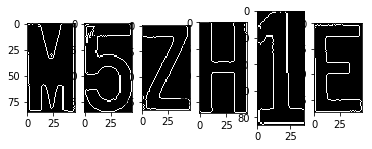

In [45]:
plt.subplot(161),plt.imshow(LETRA1*255);
plt.subplot(162),plt.imshow(LETRA2*255);
plt.subplot(163),plt.imshow(LETRA3*255);
plt.subplot(164),plt.imshow(NUM1*255);
plt.subplot(165),plt.imshow(NUM2*255);
plt.subplot(166),plt.imshow(NUM3*255);